In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import datetime

warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_info_columns', 100)
pd.set_option('display.max_columns', 100)

In [2]:
# df.to_pickle('airline_data.pkl')
df = pd.read_pickle('./airline_des_data.pkl')

# 1. 数据字段解释

这份数据是从2020-09-01至2020-10-31止，两个月内起飞的国内17个航司所有（约3万）个航班的约700万条售票数据，数据已经脱敏处理。
每一个航班从起飞前7天开始按天采集数据，直到起飞后一天（EX_DIF=-1）结束采集。航班起飞后一天的数据是航班的最终状态数据。

<table style="float: left; width: 100%;">
<thead>
<tr>
<th align="left">字段</th>
<th align="left">含义</th>
<th align="left">字段</th>
<th align="left">含义</th>
<th align="left">字段</th>
<th align="left">含义</th>
<th align="left">字段</th>
<th align="left">含义</th>
</tr>
</thead>
<tbody><tr>
<td align="left">EX_DATE</td>
<td align="left">采集日期</td>
<td align="left">CAP</td>
<td align="left">布局（总座位数）</td>
<td align="left">UPDIS_TIME</td>
<td align="left">起飞时间</td>
<td align="left">ZGLSR</td>
<td align="left">座公里收入</td>
</tr>
<tr>
<td align="left">DEP_DATE</td>
<td align="left">航班起飞日期</td>
<td align="left">CAP_F</td>
<td align="left">F布局</td>
<td align="left">PRO_INCOME</td>
<td align="left">预估收入</td>
<td align="left">KGLSR</td>
<td align="left">客公里收入</td>
</tr>
<tr>
<td align="left">AIR_CODE</td>
<td align="left">公司</td>
<td align="left">CAPS</td>
<td align="left">航节布局</td>
<td align="left">PRO_INCOMEP</td>
<td align="left">每班收入</td>
<td align="left">LKZK</td>
<td align="left">旅客折扣</td>
</tr>
<tr>
<td align="left">FLIGHT_NO</td>
<td align="left">航班</td>
<td align="left">CAPS2</td>
<td align="left">修正布局</td>
<td align="left">FLT</td>
<td align="left">航班数</td>
<td align="left">ZWZK</td>
<td align="left">座位折扣</td>
</tr>
<tr>
<td align="left">UP_LOCATION</td>
<td align="left">出发</td>
<td align="left">BKD</td>
<td align="left">实乘（累计订票数）</td>
<td align="left">KZL</td>
<td align="left">客座率</td>
<td align="left">ELINE</td>
<td align="left">航线</td>
</tr>
<tr>
<td align="left">DIS_LOCATION</td>
<td align="left">到达</td>
<td align="left">F_BKD</td>
<td align="left">F实乘</td>
<td align="left">F_KZL</td>
<td align="left">F客座率</td>
<td align="left"></td>
<td align="left"></td>
</tr>
<tr>
<td align="left">EX_DIF</td>
<td align="left">距离起飞天数(起飞后:-1)</td>
<td align="left">BKDP</td>
<td align="left">每班实乘</td>
<td align="left">LYL</td>
<td align="left">利用率</td>
<td align="left"></td>
<td align="left"></td>
</tr>
</tbody></table>

In [3]:
# 唯一确定一个航班的五要素
flight_key_cols = ['AIR_CODE', 'FLIGHT_NO', 'DEP_DATE', 'UP_LOCATION', 'DIS_LOCATION']

# 航班舱位字段 # df.columns[25:]
slot_cols = ['CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'CK', 'CL','CM', 
             'CN', 'CO', 'CP', 'CQ', 'CR', 'CS', 'CT', 'CU', 'CV', 'CW', 'CX', 'CY', 'CZ']

# 2. 数据概貌

记录总数: 6911332
起止日期: 2020-09-01T00:00:00.000000000 , 2020-10-31T00:00:00.000000000
航司总数: 17
航班总数: 28809
航段总数: 6488


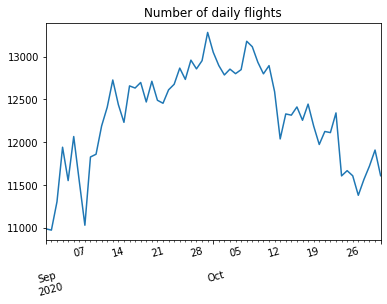

In [4]:
print('记录总数:', df.shape[0])
print('起止日期:', df.DEP_DATE.unique().min(), ',', df.DEP_DATE.unique().max())
print('航司总数:', df.AIR_CODE.unique().shape[0])
print('航班总数:', df[['AIR_CODE', 'FLIGHT_NO']].drop_duplicates().shape[0])
print('航段总数:', df[['UP_LOCATION', 'DIS_LOCATION']].drop_duplicates().shape[0])
df[df.EX_DIF == -1].DEP_DATE.value_counts().sort_index().plot(title='Number of daily flights', rot=15)

# 3. 单个航班数据示例

In [5]:
# 所有数据按照航班分组
flight_groups = df.groupby(flight_key_cols)
flight_keys = df[flight_key_cols].drop_duplicates()

In [6]:
# 随机展示一个航班数据
random_flight_key = tuple(flight_keys.sample(1).iloc[0].to_list())
flight = flight_groups.get_group(random_flight_key).sort_values(by='EX_DIF')

print('随机选择的航班: ', random_flight_key)
print('该航班起飞前7天关键销售数据:')
flight[ ['EX_DIF', 'BKD', 'KZL', 'ZWZK'] + slot_cols ]

随机选择的航班:  ('MF', 8945, Timestamp('2020-10-01 00:00:00'), 'NZH', 'CDG')
该航班起飞前7天关键销售数据:


,EX_DIF,BKD,KZL,ZWZK,CA,CB,CC,CD,CE,CF,CG,CH,CI,CJ,CK,CL,CM,CN,CO,CP,CQ,CR,CS,CT,CU,CV,CW,CX,CY,CZ
98226,-1,83,0.51875,0.274375,0,0,0,0,1,0,0,0,3,0,17,0,0,4,0,0,0,37,0,0,0,20,0,0,1,0
98218,0,85,0.53125,0.266875,0,0,0,0,1,0,0,0,3,0,10,0,0,6,0,0,0,40,0,0,0,25,0,0,0,0
98219,1,72,0.45000,0.207500,0,0,0,0,0,0,0,0,2,0,0,0,0,5,0,0,0,40,0,0,0,25,0,0,0,0
98220,2,65,0.40625,0.183125,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,38,0,0,0,25,0,0,0,0
98221,3,54,0.33750,0.152188,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,27,0,0,0,25,0,0,0,0
98222,4,52,0.32500,0.150625,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,24,0,0,0,25,0,0,0,0
98223,5,35,0.21875,0.107813,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,23,0,0,0,9,0,0,0,0
98224,6,28,0.17500,0.086875,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0
98225,7,27,0.16875,0.084062,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0


该航班的 累计/每日 订座数量:


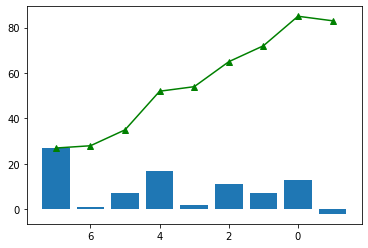

In [7]:
# 画图展示
print('该航班的 累计/每日 订座数量:')
plt.bar(flight.EX_DIF, flight.BKD - flight.BKD.shift(-1).fillna(0))
plt.plot(flight.EX_DIF, flight.BKD.values, 'g^-')
plt.gca().invert_xaxis()
plt.show()

# 4. 问题

1. 五要素('AIR_CODE', 'FLIGHT_NO', 'DEP_DATE', 'UP_LOCATION', 'DIS_LOCATION')决定一个航班。
2. D0表示航班起飞当天；D1、D2、...表示航班起飞前1天、2天、...；D-1表示航班起飞后第二天(数据中D对应的字段是EX_DIF)。
3. 在一个航班起飞前的每一天D1、D2、...D7，预测D-1天的DBK数。
4. 预测越早，越准确越好（一般来说越早越不好预测，比如D5天预测比D0天预测难度更大）。 
5. 预测时可以使用一个航班自己的数据，也可以使用任何其他航班的数据，但是注意不能用未来数据。
6. 未来数据是指不能使用预测当天之后采集的数据，比如一个航班在D3天预测，该航班D3对应的数据采集日期是2020-09-15，那么可以使用数据采集日期在2020-09-15之前的任何数据。
7. 注意航班之间形成了复杂的运输网络结构，如果使用更多的其他航班的数据，可能预测结果更好。
8. 目前的基线模型在D3预测的D-1的DBK误差在7%以内。

In [ ]:
import pandas as pd
df = pd.read_pickle('./airline_des_data.pkl')
print(df.shape)